In [41]:
from open_lib.thinkby import thinkbayes2 as tb
from open_lib.thinkby import thinkbayes2 as thinkbayes
import numpy as numpy
import numpy as np; import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [15]:
class Hockey(thinkbayes.Suite):
    """Represents hypotheses about the scoring rate for a team."""

    def __init__(self, name=''):
        """Initializes the Hockey object.

        name: string
        """
        if USE_SUMMARY_DATA:
            # prior based on each team's average goals scored
            mu = 2.8
            sigma = 0.3
        else:
            # prior based on each pair-wise match-up
            mu = 2.8
            sigma = 0.85

        pmf = thinkbayes.MakeGaussianPmf(mu, sigma, 4)
        thinkbayes.Suite.__init__(self, pmf)
            
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        Evaluates the Poisson PMF for lambda and k.

        hypo: goal scoring rate in goals per game
        data: goals scored in one period
        """
        lam = hypo
        k = data
        like = thinkbayes.EvalPoissonPmf(k, lam)
        return like

USE_SUMMARY_DATA=True

In [53]:
h1 = Hockey('h1')
h2 = Hockey('h2')

In [51]:
def plot_prior_post(item1, item2):
    k1 = pd.DataFrame(pd.DataFrame.from_dict(item1).values, columns=['x', 'p1'])
    k2 = pd.DataFrame(pd.DataFrame.from_dict(item2).values, columns=['x', 'p2'])
    k1['p2'] = k2.p2
    k1.set_index('x').plot()

In [54]:
h2.UpdateSet([0,2,8,4])

1.2449040618183202e-05

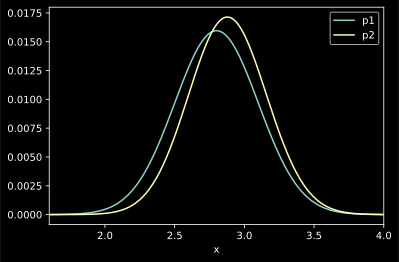

In [ ]:
plot_prior_post(h1.Items(), h2.Items())